# Purwadhika Data Science Final Project - Natural Language Processing #

[Indonesian Twitter Emotion Dataset](https://github.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset) is used for this project. This dataset will be used for train machine learning model to predict and classify the emotion from the text data of tweet.  
  
It consists of combining machine learning techniques with text using math and statistics to get that text in a format that the machine learning algorithms can understand.

Import standard library and visualization library

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

I'll use **read_csv** from _pandas_ to read the dataset.

In [4]:
df = pd.read_csv('Twitter_Emotion_Dataset.csv')

In [5]:
df.head(5)

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


## Exploratory Data Analysis ##

Checking some stats with plots and the built-in methods in pandas.

In [6]:
df.describe()

,label,tweet
count,4401,4401
unique,5,4389
top,anger,[USERNAME] Selamat Siang Sahabat Pos. Kiriman ...
freq,1101,4


In [7]:
df.groupby('label').describe()

tweet                                                               
        count unique                                                top freq
label                                                                       
anger    1101   1100  belajar agama yg tuntas jd nga ngarang dalam h...    2
fear      649    646  [USERNAME] [USERNAME] Tidak disemua tempat kit...    2
happy    1017   1012  [USERNAME] Selamat Siang Sahabat Pos. Kiriman ...    4
love      637    636  Walaupun kita jauh secara fisik, kita tahu kit...    2
sadness   997    996  Turut sepenanggungan atas meninggalnya dr. Ram...    2

In [8]:
df['label'].value_counts()

anger      1101
happy      1017
sadness     997
fear        649
love        637
Name: label, dtype: int64

From this point I like to start thinking about what feature I am going to be using and the idea of [feature enginering](https://en.wikipedia.org/wiki/Feature_engineering).  
Making a new column to detect the tweet messages length.

In [9]:
df['length'] = df['tweet'].apply(len)

## Data Visualization ##
Create visualization to see the data more clearly

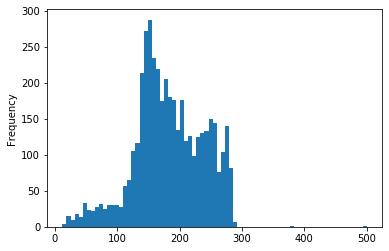

In [10]:
df['length'].plot(bins=75,kind='hist')

Create additional visualization on how text length affect the distribution of data with different labels.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C72C8C828>,
      dtype=object)

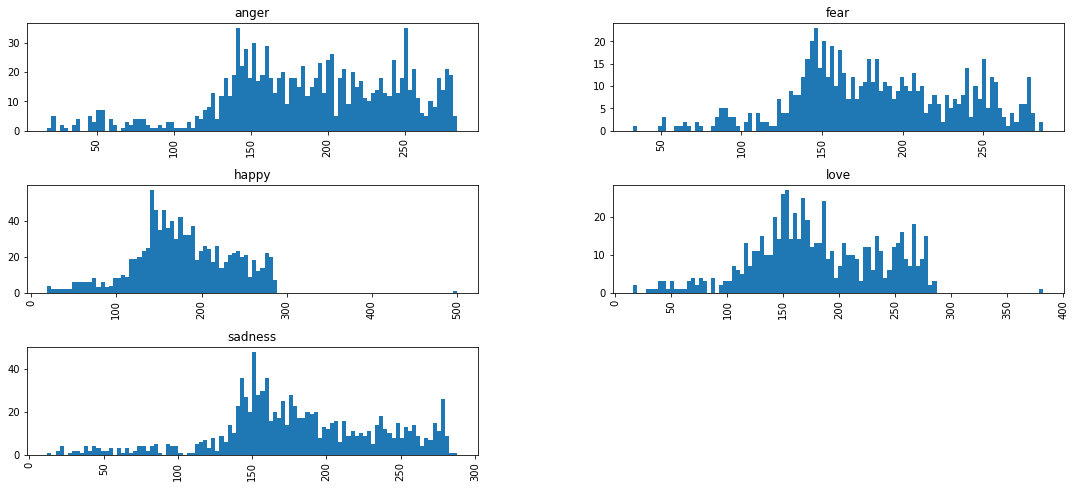

In [11]:
df.hist(column='length',by='label',bins=100,figsize=(18,8))

In [12]:
df.groupby('label').describe()

length                                                         
          count        mean        std   min    25%    50%    75%    max
label                                                                   
anger    1101.0  187.948229  56.739309  18.0  149.0  189.0  235.0  284.0
fear      649.0  183.790447  50.405417  33.0  148.0  179.0  221.0  287.0
happy    1017.0  178.261554  56.445033  19.0  143.0  173.0  218.0  500.0
love      637.0  180.249608  57.396931  16.0  144.0  173.0  226.0  382.0
sadness   997.0  180.752257  55.531223  12.0  149.0  176.0  221.0  288.0

Checking the longest text length and the lowest.

In [13]:
df[df['length']==500]['tweet'].iloc[0]

'Acara tahunan "Sanusi Family", ini lah wajah para anak, cucu, cucu menantu, dan cicit terempong. Smg thn berikutnya bs makin kompak dan lengkap #7-8juli2018 [URL]\nanger;Wkwkwkw Keknya dah seminggu lebih meledak2 mulu. Emang orang sekitar gue pada gblk atau emang gaada otaknya dari dulu cuma gue nya yg sabar\nsadness;sabar ya boy kamu slalu d hina tmanku pdhal kamu ndak salah apa"" kamu slalu d bipang manusia lastik tpikan kamu bukan manusia plastik. Kapan temanku tdak mrnghinamu boy hwaiting boy"'

In [14]:
df[df['length']==12]['tweet'].iloc[0]

'pusing guweh'

## Train Test Split ##

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df['tweet']
y = df['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Training a Model ##
I using **scikit-learn's** [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) to store a pipeline of workflow. This will allow me to set up all the transformations that we will do to the data for future use.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

The process of pipeline include:
- Using **CountVectorizer** to convert those tweet into a matrix of token counts.
- Using **TfidfTransformer** to measures how frequent a term occurs in a document and measures how important a term is.
- Last step of the pipeline is decide the machine learning for the classifier.

In [19]:
# dikarenakan kata dari tweet yang sangat beragam membuat proses tfidf menjadi tidak efektif
pipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [20]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [21]:
prediksi = pipeline.predict(X_test)

## Model Evaluation ##

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(classification_report(y_test,prediksi))

              precision    recall  f1-score   support

       anger       0.55      0.87      0.68       229
        fear       1.00      0.24      0.38       119
       happy       0.73      0.60      0.66       214
        love       0.91      0.36      0.52       119
     sadness       0.46      0.61      0.52       200

    accuracy                           0.59       881
   macro avg       0.73      0.54      0.55       881
weighted avg       0.68      0.59      0.58       881



In [24]:
print(confusion_matrix(y_test,prediksi))

[[200   0   5   0  24]
 [ 50  28   8   1  32]
 [ 42   0 128   3  41]
 [ 11   0  15  43  50]
 [ 58   0  19   0 123]]


## Improve Machine Learning Model ##
My assumptions is that **TfidfTransformer** make the model the worse than its hould be and now I am exclude the _Tfidf_ from the pipeline and trying to use other classifier model to see how each of the model works.

In [25]:
multinomial_pipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('classifier',MultinomialNB())
])
sgdc_pipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('classifier',SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))
])
logreg_pipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier',LogisticRegression(solver='newton-cg',multi_class='auto'))
])
cnb_pipeline = Pipeline([
    ('cv',CountVectorizer()),
    ('classifier',ComplementNB())
])

In [26]:
multinomial_pipeline.fit(X_train,y_train)
sgdc_pipeline.fit(X_train,y_train)
logreg_pipeline.fit(X_train,y_train)
cnb_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 ComplementNB(alpha=1.0, class_prior=None, fit_prior=True,
                              norm=False))],
         verbose=False)

In [27]:
multinomial_prediksi = multinomial_pipeline.predict(X_test)
sgdc_prediksi = sgdc_pipeline.predict(X_test)
logreg_prediksi = logreg_pipeline.predict(X_test)
cnb_prediksi = cnb_pipeline.predict(X_test)

### MultinomialNB ###

In [28]:
print(classification_report(y_test,multinomial_prediksi))
print(confusion_matrix(y_test,multinomial_prediksi))

              precision    recall  f1-score   support

       anger       0.68      0.81      0.74       229
        fear       0.67      0.61      0.64       119
       happy       0.74      0.58      0.65       214
        love       0.74      0.69      0.71       119
     sadness       0.54      0.59      0.56       200

    accuracy                           0.66       881
   macro avg       0.67      0.66      0.66       881
weighted avg       0.67      0.66      0.66       881

[[185  11   7   1  25]
 [ 19  72  12   2  14]
 [ 25   6 125  18  40]
 [  4   2   7  82  24]
 [ 38  16  19   8 119]]


### Stochastic Gradient Descent (SGD) Classifier ###

In [29]:
print(classification_report(y_test,sgdc_prediksi))
print(confusion_matrix(y_test,sgdc_prediksi))

              precision    recall  f1-score   support

       anger       0.63      0.62      0.63       229
        fear       0.66      0.64      0.65       119
       happy       0.61      0.70      0.65       214
        love       0.73      0.79      0.76       119
     sadness       0.54      0.45      0.49       200

    accuracy                           0.63       881
   macro avg       0.63      0.64      0.63       881
weighted avg       0.62      0.63      0.62       881

[[142  16  29   5  37]
 [ 16  76  17   1   9]
 [ 20  10 150  10  24]
 [  6   3   9  94   7]
 [ 41  10  41  19  89]]


### Logistic Regression ###

In [30]:
print(classification_report(y_test,logreg_prediksi))
print(confusion_matrix(y_test,logreg_prediksi))

              precision    recall  f1-score   support

       anger       0.63      0.73      0.68       229
        fear       0.68      0.56      0.61       119
       happy       0.62      0.55      0.58       214
        love       0.62      0.67      0.64       119
     sadness       0.48      0.47      0.47       200

    accuracy                           0.60       881
   macro avg       0.60      0.60      0.60       881
weighted avg       0.60      0.60      0.59       881

[[168  11  15   7  28]
 [ 22  67   7   2  21]
 [ 30   4 117  27  36]
 [  5   3  14  80  17]
 [ 42  14  36  14  94]]


### ComplementNB ###

In [31]:
print(classification_report(y_test,cnb_prediksi))
print(confusion_matrix(y_test,cnb_prediksi))

              precision    recall  f1-score   support

       anger       0.67      0.81      0.73       229
        fear       0.60      0.72      0.65       119
       happy       0.72      0.57      0.64       214
        love       0.60      0.79      0.68       119
     sadness       0.60      0.40      0.48       200

    accuracy                           0.64       881
   macro avg       0.64      0.66      0.64       881
weighted avg       0.65      0.64      0.64       881

[[185  17   8   7  12]
 [ 16  86   6   3   8]
 [ 29   7 123  30  25]
 [  4   5   8  94   8]
 [ 43  29  25  23  80]]


It seems **MultinomialNB** achieve highest accuracy compared to the other models.

Now trying to test the model using the **data** that model never seen before.

In [32]:
tweet = ["Soal 'mantan'.Jadi gimana? Masih mikirin mantan?"]
prediksi_test_cnb = multinomial_pipeline.predict(tweet)

In [33]:
prediksi_test_cnb

array(['sadness'], dtype='<U7')

In [34]:
multinomial_pipeline.predict_proba(tweet)

array([[0.17668664, 0.08828539, 0.01820381, 0.0026726 , 0.71415156]])

## Create Joblib Model for Applications ##

In [35]:
# import joblib

In [36]:
# joblib.dump(multinomial_pipeline, 'model_multinomial_twitter')